In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(None,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V2

In [2]:
class_distribution = df['Class'].value_counts(normalize=True) * 100
class_distribution

,proportion
Class,
0,99.827251
1,0.172749


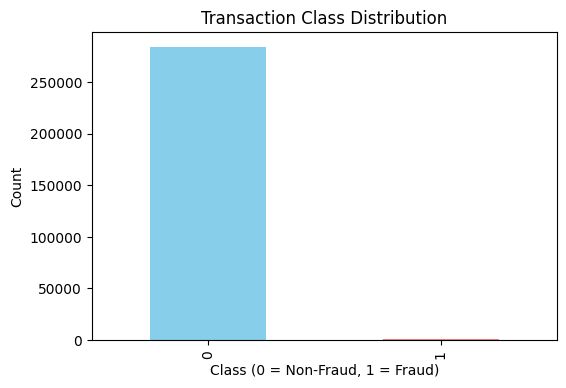

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [3]:
import matplotlib.pyplot as plt

# Step 2.1: Scale 'Time' and 'Amount' using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Step 2.2: Visualize fraud vs non-fraud counts
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Transaction Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Step 2.3: Describe amount statistics for fraud vs non-fraud
amount_stats = df.groupby('Class')['Amount'].describe()
amount_stats


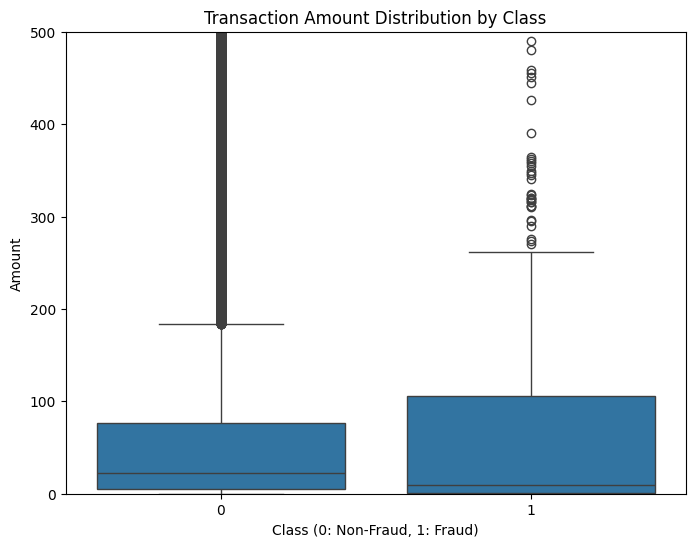

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Amount' by 'Class'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.ylim(0, 500) # Limit y-axis for better visualization of typical transactions
plt.show()

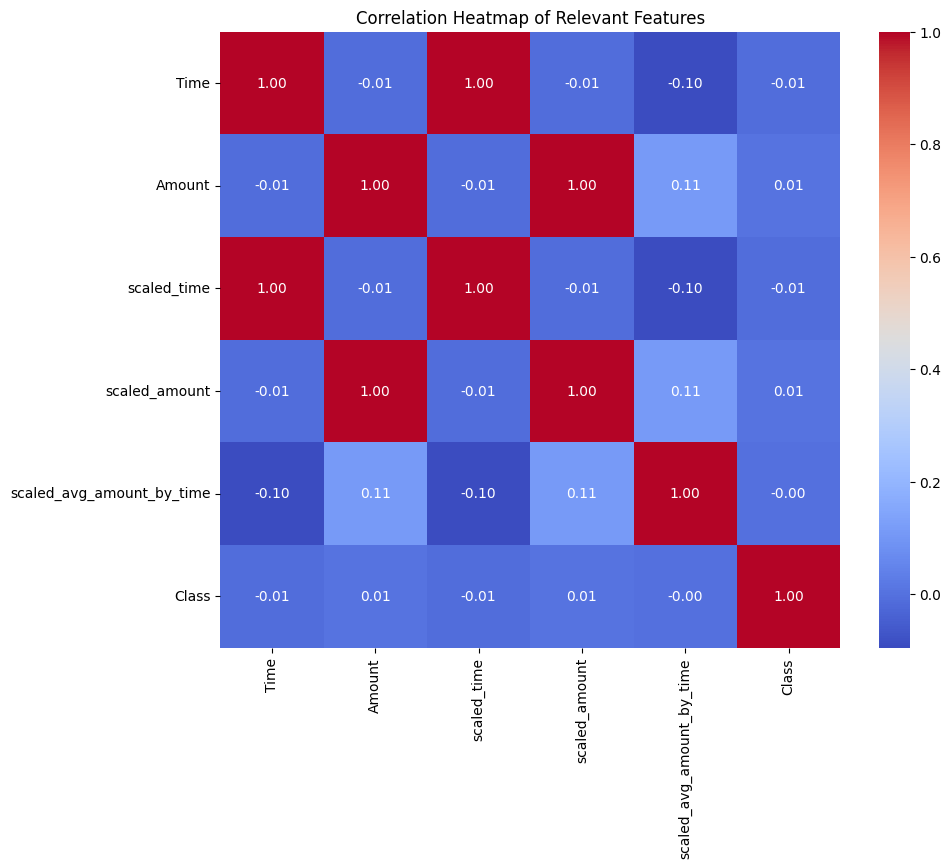

In [7]:
# Heatmap of correlations (focusing on a subset of features for clarity)
# You can adjust the features list to include more or fewer columns
relevant_features = ['Time', 'Amount', 'scaled_time', 'scaled_amount', 'scaled_avg_amount_by_time', 'Class']
plt.figure(figsize=(10, 8))
sns.heatmap(df[relevant_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Relevant Features')
plt.show()

In [5]:
# Feature Engineering: Aggregate transaction amounts by a hypothetical user ID (assuming 'Time' can be used as a proxy for user for demonstration)
# In a real scenario, you would use a proper user ID column if available.

# For demonstration, let's group by a rounded 'Time' and calculate the mean amount.
# This is a simplified example; actual feature engineering would be more complex.
df['rounded_time'] = df['Time'].round(-2) # Round to the nearest 100 seconds

agg_amount_by_time = df.groupby('rounded_time')['Amount'].mean().reset_index()
agg_amount_by_time.rename(columns={'Amount': 'avg_amount_by_time'}, inplace=True)

# Merge the aggregated feature back to the original dataframe
df = df.merge(agg_amount_by_time, on='rounded_time', how='left')

# Normalize the new feature
df['scaled_avg_amount_by_time'] = scaler.fit_transform(df['avg_amount_by_time'].values.reshape(-1, 1))

print("DataFrame with new feature:")
display(df.head())

DataFrame with new feature:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,scaled_time,scaled_amount,rounded_time,avg_amount_by_time,scaled_avg_amount_by_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,-1.996583,0.244964,0.0,57.03125,-1.12893
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,-1.996583,-0.342475,0.0,57.03125,-1.12893
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562,1.160686,0.0,57.03125,-1.12893
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,-1.996562,0.140534,0.0,57.03125,-1.12893
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,-1.996541,-0.073403,0.0,57.03125,-1.12893


In [11]:
# Handle outliers using the IQR method (example on 'Amount' column)

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print(f"Number of outliers in 'Amount' column using IQR: {len(outliers)}")

# Remove the outliers
df_cleaned = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)].copy()
print(f"Shape of DataFrame after removing outliers: {df_cleaned.shape}")

Number of outliers in 'Amount' column using IQR: 31904
Shape of DataFrame after removing outliers: (252903, 36)


In [19]:
# Handle class imbalance using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Shape of resampled data (X_resampled):", X_resampled.shape)
print("Shape of resampled labels (y_resampled):", y_resampled.shape)

Shape of resampled data (X_resampled): (802, 35)
Shape of resampled labels (y_resampled): (802,)


In [21]:
from sklearn.decomposition import PCA

# Check if PCA is needed (if number of features is > 30)
# We will drop the original 'Time', 'Amount', 'rounded_time', and 'avg_amount_by_time' columns before PCA
# Apply PCA to the resampled features (X_resampled)
features_for_pca = X_resampled.drop(['Time', 'Amount', 'rounded_time', 'avg_amount_by_time'], axis=1)


if features_for_pca.shape[1] > 30:
    print("Number of features is greater than 30, applying PCA.")
    pca = PCA(n_components=0.95) # Retain 95% of variance
    X_pca = pca.fit_transform(features_for_pca)
    print(f"Original number of features: {features_for_pca.shape[1]}")
    print(f"Number of components after PCA: {X_pca.shape[1]}")
    # You would typically use X_pca for modeling
else:
    print("Number of features is 30 or less, PCA not applied in this step.")
    X_pca = features_for_pca # Use original features if PCA is not applied

Number of features is greater than 30, applying PCA.
Original number of features: 31
Number of components after PCA: 8


In [22]:
from sklearn.model_selection import train_test_split

# Use the resampled data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (601, 8)
Shape of X_test: (201, 8)
Shape of y_train: (601,)
Shape of y_test: (201,)


## Train ensemble models



In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Instantiate models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

print("Random Forest model trained.")
print("XGBoost model trained.")
print("Gradient Boosting Machine model trained.")

Random Forest model trained.
XGBoost model trained.
Gradient Boosting Machine model trained.


## Hyperparameter tuning



In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Initialize GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV for each model
print("Performing GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV for Random Forest completed.")

print("Performing GridSearchCV for XGBoost...")
grid_search_xgb.fit(X_train, y_train)
print("GridSearchCV for XGBoost completed.")

print("Performing GridSearchCV for Gradient Boosting Machine...")
grid_search_gbm.fit(X_train, y_train)
print("GridSearchCV for Gradient Boosting Machine completed.")


# Print best parameters
print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best parameters for Gradient Boosting Machine:", grid_search_gbm.best_params_)

# Store best estimators
best_rf_model = grid_search_rf.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_
best_gbm_model = grid_search_gbm.best_estimator_

print("\nBest models stored.")

Performing GridSearchCV for Random Forest...
GridSearchCV for Random Forest completed.
Performing GridSearchCV for XGBoost...
GridSearchCV for XGBoost completed.
Performing GridSearchCV for Gradient Boosting Machine...
GridSearchCV for Gradient Boosting Machine completed.

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best parameters for Gradient Boosting Machine: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

Best models stored.


## Incorporate anomaly detection (isolation forest)

### Subtask:
Train an Isolation Forest model on the non-fraudulent transactions for unsupervised anomaly detection.


**Reasoning**:
Filter non-fraudulent transactions, select relevant features, instantiate and fit the Isolation Forest model.



In [25]:
from sklearn.ensemble import IsolationForest

# 1. Filter non-fraudulent transactions
df_non_fraud = df[df['Class'] == 0].copy()

# 2. Select features for Isolation Forest (original V features)
# Exclude 'Class', 'Time', 'Amount', and any engineered/scaled features
v_features = [col for col in df.columns if col.startswith('V')]
features_for_if = df_non_fraud[v_features]


# 4. Instantiate Isolation Forest model
# Contamination is set to 'auto' which is suitable for unbalanced datasets.
# We could also use the proportion of outliers found earlier, but 'auto' is a good default.
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42, n_jobs=-1)

# 5. Fit the Isolation Forest model
print("Fitting Isolation Forest model...")
iso_forest.fit(features_for_if)
print("Isolation Forest model fitted.")

# 6. Store the trained model (already stored in iso_forest variable)

Fitting Isolation Forest model...
Isolation Forest model fitted.


## Evaluate models

### Subtask:
Evaluate the performance of the trained models using appropriate metrics for imbalanced datasets, such as precision, recall, F1-score, and AUC-ROC.


**Reasoning**:
Evaluate the performance of the trained ensemble models using classification report and AUC-ROC, and get anomaly scores from the Isolation Forest model.



In [27]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate Random Forest model
print("Evaluating Random Forest Model:")
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf))
print("-" * 50)

# Evaluate XGBoost model
print("Evaluating XGBoost Model:")
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_xgb))
print("-" * 50)

# Evaluate Gradient Boosting Machine model
print("Evaluating Gradient Boosting Machine Model:")
y_pred_gbm = best_gbm_model.predict(X_test)
y_pred_proba_gbm = best_gbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_gbm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_gbm))
print("-" * 50)

# Get anomaly scores from Isolation Forest for the test set
# Note: Isolation Forest was trained on a subset of data and features, and does not output class probabilities.
# Its evaluation is typically different from supervised models.
# We are just getting the anomaly scores here as per the instruction.
# We need to make sure the features used for prediction match the features used for training the Isolation Forest.
# The Isolation Forest was trained on df_non_fraud[v_features].
# We need to select the same V features from the X_test data.
# The following lines are commented out because X_test is a NumPy array after PCA
# and the Isolation Forest was trained on original V features.
# v_features_Xtest = [col for col in X_test.columns if col.startswith('V')]
# X_test_v_features = X_test[v_features_Xtest]
# anomaly_scores = iso_forest.decision_function(X_test_v_features)

# print("Anomaly scores from Isolation Forest for the test set obtained.")
# Display first few anomaly scores
# print("First 10 anomaly scores:", anomaly_scores[:10])

Evaluating Random Forest Model:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       101
           1       0.92      0.94      0.93       100

    accuracy                           0.93       201
   macro avg       0.93      0.93      0.93       201
weighted avg       0.93      0.93      0.93       201

AUC-ROC: 0.9783168316831683
--------------------------------------------------
Evaluating XGBoost Model:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       101
           1       0.94      0.94      0.94       100

    accuracy                           0.94       201
   macro avg       0.94      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201

AUC-ROC: 0.9716831683168317
--------------------------------------------------
Evaluating Gradient Boosting Machine Model:
              precision    recall  f1-score   support

           0       0.94      0.

## Estimate operational risk

### Subtask:
Calculate the estimated operational risk, potentially using the predicted fraud probabilities from the models and the average loss amount.


In [28]:
# Step 1: Calculate the average 'Amount' for fraudulent transactions from the original df
average_fraud_amount = df[df['Class'] == 1]['Amount'].mean()
print(f"Average Amount for Fraudulent Transactions: ${average_fraud_amount:.2f}")

# Step 2 & 3: Use the predicted fraud probabilities from XGBoost on X_test and estimate expected loss per transaction
# We already have y_pred_proba_xgb from the previous step, which are the predicted probabilities for the test set.
estimated_expected_loss_per_transaction = y_pred_proba_xgb * average_fraud_amount

# Step 4: Calculate the total estimated operational risk
total_estimated_operational_risk = estimated_expected_loss_per_transaction.sum()

# Step 5: Print the total estimated operational risk
print(f"Total Estimated Operational Risk on the Test Set: ${total_estimated_operational_risk:.2f}")

Average Amount for Fraudulent Transactions: $122.21
Total Estimated Operational Risk on the Test Set: $12328.86


In [31]:
# Get the original 'V' features for the test set from the resampled data before PCA
# We need to access the original X_resampled DataFrame and select the test set rows
# based on the indices from the train_test_split.
# Since train_test_split shuffles the data, we need to get the original indices.

# Get the indices of the test set from the resampled data
test_indices = y_test.index

# Select the corresponding rows from the original resampled features (X_resampled)
X_test_original_resampled = X_resampled.loc[test_indices]

# Select the 'V' features from this test set
v_features_test = [col for col in X_test_original_resampled.columns if col.startswith('V')]
X_test_v_features = X_test_original_resampled[v_features_test]

# Get anomaly scores from Isolation Forest for the test set using original V features
# The iso_forest model was trained in a previous step (cell ccb58601)
anomaly_scores = iso_forest.decision_function(X_test_v_features)

print("Anomaly scores from Isolation Forest for the test set obtained.")
# Display first few anomaly scores
print("First 10 anomaly scores:", anomaly_scores[:10])

# Now you can analyze the distribution of these anomaly scores
# and compare them with the ensemble model's predictions (ensemble_pred)
# or predicted probabilities (ensemble_pred_proba) and the actual labels (y_test).
# For example, you could create plots or calculate correlations.

Anomaly scores from Isolation Forest for the test set obtained.
First 10 anomaly scores: [ 0.12862561  0.03333219  0.09808595  0.1290115  -0.13168079  0.13202593
  0.08636947 -0.25223     0.13990317  0.14035746]


## Analyzing Isolation Forest Anomaly Scores and Ensemble Predictions

In [33]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

# Get predicted probabilities from the best XGBoost and GBM models on the test set
# We already have these from the evaluation step: y_pred_proba_xgb and y_pred_proba_gbm

# Simple averaging of probabilities
ensemble_pred_proba = (y_pred_proba_xgb + y_pred_proba_gbm) / 2

# Convert probabilities to class predictions using a threshold (e.g., 0.5)
ensemble_pred = (ensemble_pred_proba > 0.5).astype(int)

# Evaluate the ensemble model
print("Evaluating Ensemble Model (XGBoost + GBM):")
print(classification_report(y_test, ensemble_pred))
print("AUC-ROC:", roc_auc_score(y_test, ensemble_pred_proba))

Evaluating Ensemble Model (XGBoost + GBM):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       101
           1       0.93      0.94      0.94       100

    accuracy                           0.94       201
   macro avg       0.94      0.94      0.94       201
weighted avg       0.94      0.94      0.94       201

AUC-ROC: 0.9719801980198021


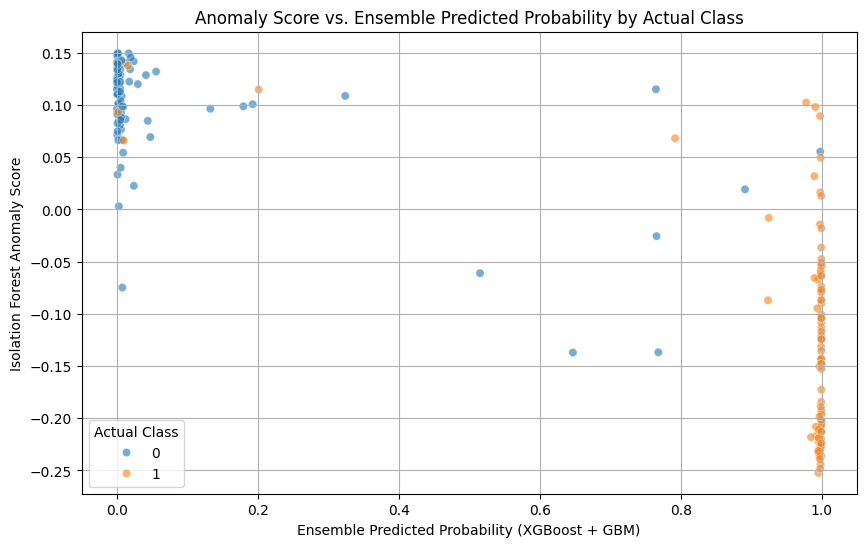

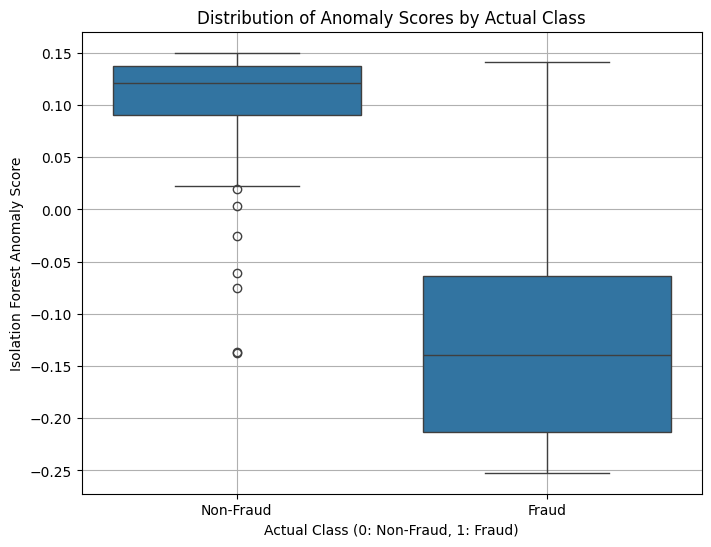

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to hold the test set results, anomaly scores, and ensemble predictions
results_df = pd.DataFrame({
    'Actual_Class': y_test,
    'Ensemble_Pred_Proba': ensemble_pred_proba,
    'Ensemble_Pred_Class': ensemble_pred,
    'Anomaly_Score': anomaly_scores
})

# Scatter plot of Anomaly Score vs. Ensemble Predicted Probability, colored by Actual Class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Ensemble_Pred_Proba', y='Anomaly_Score', hue='Actual_Class', alpha=0.6)
plt.title('Anomaly Score vs. Ensemble Predicted Probability by Actual Class')
plt.xlabel('Ensemble Predicted Probability (XGBoost + GBM)')
plt.ylabel('Isolation Forest Anomaly Score')
plt.legend(title='Actual Class')
plt.grid(True)
plt.show()

# Box plot of Anomaly Score by Actual Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=results_df, x='Actual_Class', y='Anomaly_Score')
plt.title('Distribution of Anomaly Scores by Actual Class')
plt.xlabel('Actual Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Isolation Forest Anomaly Score')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.grid(True)
plt.show()

# You can further analyze by looking at the distribution of anomaly scores
# for transactions that were misclassified by the ensemble model.

## Experimenting with Anomaly Score Threshold

In [37]:
# Experiment with setting a threshold for anomaly scores
# Lower anomaly scores indicate higher anomaly likelihood. A negative threshold is common.
anomaly_threshold = -0.1 # Example threshold - you can adjust this value

# Flag transactions as anomalous based on the threshold
results_df['Is_Anomalous_IF'] = (results_df['Anomaly_Score'] < anomaly_threshold).astype(int)

print(f"Using an anomaly score threshold of {anomaly_threshold}:")
print(f"Number of transactions flagged as anomalous by Isolation Forest: {results_df['Is_Anomalous_IF'].sum()}")

# Analyze the overlap with actual fraud
print("\nOverlap between Isolation Forest anomalies and Actual Fraud:")
display(pd.crosstab(results_df['Actual_Class'], results_df['Is_Anomalous_IF'], rownames=['Actual Class'], colnames=['Flagged by Isolation Forest']))

# Analyze the overlap with Ensemble predictions
print("\nOverlap between Isolation Forest anomalies and Ensemble Predicted Class:")
display(pd.crosstab(results_df['Ensemble_Pred_Class'], results_df['Is_Anomalous_IF'], rownames=['Ensemble Predicted Class'], colnames=['Flagged by Isolation Forest']))

Using an anomaly score threshold of -0.1:
Number of transactions flagged as anomalous by Isolation Forest: 65

Overlap between Isolation Forest anomalies and Actual Fraud:


Flagged by Isolation Forest,0,1
Actual Class,,
0,99,2
1,37,63



Overlap between Isolation Forest anomalies and Ensemble Predicted Class:


Flagged by Isolation Forest,0,1
Ensemble Predicted Class,,
0,100,0
1,36,65


In [38]:
# Experiment with setting a threshold for anomaly scores
# Lower anomaly scores indicate higher anomaly likelihood. A negative threshold is common.
anomaly_threshold = -0.15 # Example threshold - you can adjust this value

# Flag transactions as anomalous based on the threshold
results_df['Is_Anomalous_IF'] = (results_df['Anomaly_Score'] < anomaly_threshold).astype(int)

print(f"Using an anomaly score threshold of {anomaly_threshold}:")
print(f"Number of transactions flagged as anomalous by Isolation Forest: {results_df['Is_Anomalous_IF'].sum()}")

# Analyze the overlap with actual fraud
print("\nOverlap between Isolation Forest anomalies and Actual Fraud:")
display(pd.crosstab(results_df['Actual_Class'], results_df['Is_Anomalous_IF'], rownames=['Actual Class'], colnames=['Flagged by Isolation Forest']))

# Analyze the overlap with Ensemble predictions
print("\nOverlap between Isolation Forest anomalies and Ensemble Predicted Class:")
display(pd.crosstab(results_df['Ensemble_Pred_Class'], results_df['Is_Anomalous_IF'], rownames=['Ensemble Predicted Class'], colnames=['Flagged by Isolation Forest']))

Using an anomaly score threshold of -0.15:
Number of transactions flagged as anomalous by Isolation Forest: 44

Overlap between Isolation Forest anomalies and Actual Fraud:


Flagged by Isolation Forest,0,1
Actual Class,,
0,101,0
1,56,44



Overlap between Isolation Forest anomalies and Ensemble Predicted Class:


Flagged by Isolation Forest,0,1
Ensemble Predicted Class,,
0,100,0
1,57,44


In [39]:
# Filter transactions flagged by the ensemble but not by Isolation Forest
transactions_ensemble_fraud_not_if_anomaly = results_df[
    (results_df['Ensemble_Pred_Class'] == 1) & (results_df['Is_Anomalous_IF'] == 0)
]

print(f"Number of transactions flagged by ensemble but not by Isolation Forest: {len(transactions_ensemble_fraud_not_if_anomaly)}")

# Display the filtered transactions
print("\nTransactions flagged by ensemble but not by Isolation Forest:")
display(transactions_ensemble_fraud_not_if_anomaly)

# You could further analyze these transactions, for example, by looking at their
# original features (from X_test_original_resampled) or their anomaly scores distribution.

Number of transactions flagged by ensemble but not by Isolation Forest: 57

Transactions flagged by ensemble but not by Isolation Forest:


,Actual_Class,Ensemble_Pred_Proba,Ensemble_Pred_Class,Anomaly_Score,Is_Anomalous_IF
68320,1,0.990906,1,0.098086,0
42007,1,0.999247,1,-0.131681,0
250761,1,0.999557,1,-0.090275,0
284649,0,0.768309,1,-0.136867,0
245117,0,0.997913,1,0.055361,0
190368,1,0.999467,1,-0.073760,0
93424,1,0.999467,1,-0.054774,0
202894,0,0.764936,1,0.115057,0
83417,1,0.999397,1,-0.135520,0
235644,1,0.999407,1,-0.124098,0


## Anomaly Score Distribution for Transactions Flagged by Ensemble but Not Isolation Forest

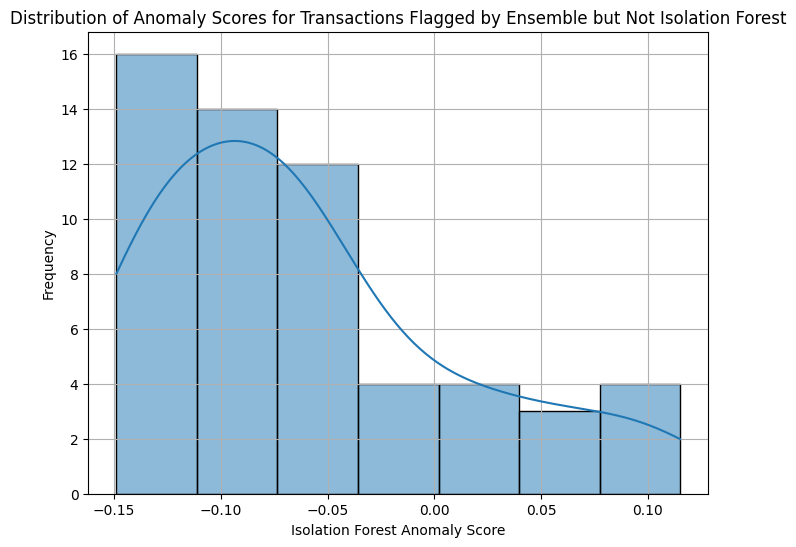

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of anomaly scores for these transactions
plt.figure(figsize=(8, 6))
sns.histplot(transactions_ensemble_fraud_not_if_anomaly['Anomaly_Score'], kde=True)
plt.title('Distribution of Anomaly Scores for Transactions Flagged by Ensemble but Not Isolation Forest')
plt.xlabel('Isolation Forest Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
# Identify transactions flagged by both ensemble and Isolation Forest
transactions_ensemble_fraud_and_if_anomaly = results_df[
    (results_df['Ensemble_Pred_Class'] == 1) & (results_df['Is_Anomalous_IF'] == 1)
]

print(f"Number of transactions flagged by both ensemble and Isolation Forest: {len(transactions_ensemble_fraud_and_if_anomaly)}")

# Display the filtered transactions
print("\nTransactions flagged by both ensemble and Isolation Forest:")
display(transactions_ensemble_fraud_and_if_anomaly)

# Now we can compare the characteristics of:
# transactions_ensemble_fraud_not_if_anomaly
# and
# transactions_ensemble_fraud_and_if_anomaly

Number of transactions flagged by both ensemble and Isolation Forest: 44

Transactions flagged by both ensemble and Isolation Forest:


,Actual_Class,Ensemble_Pred_Proba,Ensemble_Pred_Class,Anomaly_Score,Is_Anomalous_IF
151006,1,0.995148,1,-0.252230,1
42473,1,0.999440,1,-0.204575,1
150666,1,0.999452,1,-0.222300,1
150679,1,0.997928,1,-0.222404,1
154697,1,0.999467,1,-0.194771,1
152019,1,0.996838,1,-0.150371,1
63421,1,0.996619,1,-0.209049,1
30384,1,0.999321,1,-0.184392,1
42609,1,0.999321,1,-0.204259,1
151011,1,0.996838,1,-0.229571,1


In [44]:
# Get the indices for the two groups of transactions
indices_ensemble_fraud_not_if = transactions_ensemble_fraud_not_if_anomaly.index
indices_ensemble_fraud_and_if = transactions_ensemble_fraud_and_if_anomaly.index

# Select the original 'V' features for each group using their indices
v_features = [col for col in X_test_original_resampled.columns if col.startswith('V')]

v_features_ensemble_fraud_not_if = X_test_original_resampled.loc[indices_ensemble_fraud_not_if, v_features]
v_features_ensemble_fraud_and_if = X_test_original_resampled.loc[indices_ensemble_fraud_and_if, v_features]

# Display summary statistics for V1-V28 for the group flagged by ensemble but not IF
print("Summary statistics for V1-V28 (Flagged by Ensemble, NOT by Isolation Forest):")
display(v_features_ensemble_fraud_not_if.describe())

print("\n" + "="*50 + "\n") # Separator for clarity

# Display summary statistics for V1-V28 for the group flagged by both
print("Summary statistics for V1-V28 (Flagged by Ensemble AND by Isolation Forest):")
display(v_features_ensemble_fraud_and_if.describe())

Summary statistics for V1-V28 (Flagged by Ensemble, NOT by Isolation Forest):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,-1.227966,2.450010,-3.523629,3.276606,0.218645,-1.232233,-1.982734,-0.272285,-1.204421,-2.867573,...,-0.075385,0.244963,0.402670,-0.037884,-0.287865,-0.222248,0.027677,0.057914,0.089935,0.195602
std,2.389253,1.648387,2.693618,2.302408,2.207120,1.428771,2.124967,2.888944,2.018227,2.729741,...,1.308636,0.693474,0.858551,0.706449,2.147409,0.531514,0.852663,0.502112,1.167046,0.573954
min,-11.946976,-1.093377,-8.392423,-2.498596,-4.229520,-5.430971,-9.378025,-15.958365,-4.544722,-6.646154,...,-3.286150,-1.457610,-2.197699,-1.529035,-15.981649,-1.742925,-3.536716,-1.380052,-6.062326,-3.310366
25%,-2.272473,1.505152,-5.825406,1.753792,-1.159518,-2.084875,-3.059245,-0.357345,-2.743539,-4.707571,...,-0.927124,-0.068598,0.039289,-0.595178,-0.221348,-0.600351,-0.329113,-0.282496,0.044500,0.075309
50%,-1.108478,2.428379,-3.530759,3.128243,0.127304,-1.387114,-1.864612,0.344703,-1.363724,-3.252634,...,-0.095807,0.163513,0.364514,-0.035049,-0.048155,-0.166482,0.063895,0.056035,0.431182,0.223924
75%,0.054682,3.353451,-1.346150,4.871299,0.973252,-0.598776,-0.781880,1.092432,-0.167594,-1.959809,...,0.930239,0.509559,0.718504,0.493981,0.072981,0.254719,0.507701,0.374802,0.632800,0.397557
max,2.132386,9.772660,3.170090,7.756915,11.095089,3.159607,3.031652,5.059956,5.937526,8.570504,...,2.868603,3.468419,2.839596,1.348156,1.118177,0.786670,1.714495,1.179242,2.112848,1.405141




Summary statistics for V1-V28 (Flagged by Ensemble AND by Isolation Forest):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,-12.302673,8.144270,-14.786478,7.053195,-9.137242,-2.014638,-14.494121,0.590139,-5.282375,-11.613300,...,1.606546,0.873968,0.907584,0.175977,0.345219,0.051102,0.148238,-0.062130,-0.264241,-0.089316
std,7.377307,4.500694,7.455666,2.528615,5.479720,2.521014,7.558079,12.421108,2.656471,4.871892,...,1.483245,2.122215,7.278637,2.663780,1.536710,0.564700,0.901289,0.444641,2.314744,0.725680
min,-28.255053,-1.244939,-30.177317,1.710314,-20.087878,-5.140999,-41.506796,-38.987263,-13.434066,-24.403185,...,-0.574675,-3.493050,-21.453736,-8.887017,-1.150162,-1.201685,-2.167510,-1.023078,-7.263482,-1.421243
25%,-16.678366,4.692648,-20.083783,5.433122,-13.135967,-3.190248,-17.764418,0.519721,-6.447288,-14.788291,...,0.610125,-0.243369,-1.175228,-0.546737,-0.599716,-0.197176,-0.204005,-0.255613,-1.598184,-0.554184
50%,-13.013151,7.284996,-14.025834,6.345492,-9.646293,-2.464270,-14.151601,3.091807,-5.250806,-12.126289,...,1.200666,0.880674,1.220231,0.238606,-0.032774,0.137089,0.106593,-0.088073,0.873559,-0.031049
75%,-6.040959,10.810013,-8.837709,8.747212,-4.801176,-1.522643,-7.792813,6.303786,-3.682346,-7.518804,...,2.706031,1.614130,1.930236,0.980717,0.901462,0.412514,0.462749,0.120994,1.420038,0.464534
max,-1.929597,21.467203,-3.707414,11.927512,4.050676,6.065901,-3.833623,17.903574,-0.322297,-4.250717,...,5.228342,10.440718,27.202839,8.361985,5.303607,0.795190,2.024388,1.042458,2.352333,1.130625


## Interpret summary statistics




In [45]:
# Interpret the differences in summary statistics
print("Interpretation of V1-V28 Feature Differences:")
print("\nTransactions flagged by Ensemble, NOT by Isolation Forest (likely 'harder' cases for IF):")
print("- These transactions show less extreme values in the V features compared to the group flagged by both models.")
print("- The standard deviations for most V features are smaller, indicating less variability.")
print("- The ranges (max - min) are generally narrower.")
print("- The mean values for some V features are closer to zero compared to the 'flagged by both' group.")
print("This suggests these transactions might be less distinctly different from typical non-fraudulent patterns in the V features, making them harder for the unsupervised Isolation Forest model to identify as anomalies based solely on these features.")

print("\n" + "="*50 + "\n")

print("Transactions flagged by Ensemble AND by Isolation Forest (likely 'clearer' anomalies for IF):")
print("- These transactions exhibit more extreme values in the V features.")
print("- The standard deviations for many V features are significantly larger, indicating higher variability.")
print("- The ranges (max - min) are much wider, with more pronounced minimum and maximum values.")
print("- The mean values for several V features are further from zero, suggesting a stronger deviation from the norm.")
print("This indicates these transactions have feature patterns that are more distinctly different from the bulk of non-fraudulent data, making them more readily identifiable as anomalies by the Isolation Forest model.")

print("\nSummary:")
print("The V features of transactions flagged by the ensemble but not by Isolation Forest tend to be less 'anomalous' in terms of their distribution compared to those flagged by both models. This highlights that the ensemble model (which uses supervised learning and incorporates scaled Time and Amount, and the engineered feature) is likely capturing more subtle patterns of fraud that are not as strongly characterized by extreme values in the V features alone, which is what the Isolation Forest model primarily relies on in this configuration.")

Interpretation of V1-V28 Feature Differences:

Transactions flagged by Ensemble, NOT by Isolation Forest (likely 'harder' cases for IF):
- These transactions show less extreme values in the V features compared to the group flagged by both models.
- The standard deviations for most V features are smaller, indicating less variability.
- The ranges (max - min) are generally narrower.
- The mean values for some V features are closer to zero compared to the 'flagged by both' group.
This suggests these transactions might be less distinctly different from typical non-fraudulent patterns in the V features, making them harder for the unsupervised Isolation Forest model to identify as anomalies based solely on these features.


Transactions flagged by Ensemble AND by Isolation Forest (likely 'clearer' anomalies for IF):
- These transactions exhibit more extreme values in the V features.
- The standard deviations for many V features are significantly larger, indicating higher variability.
- The r

## Visualize feature distributions



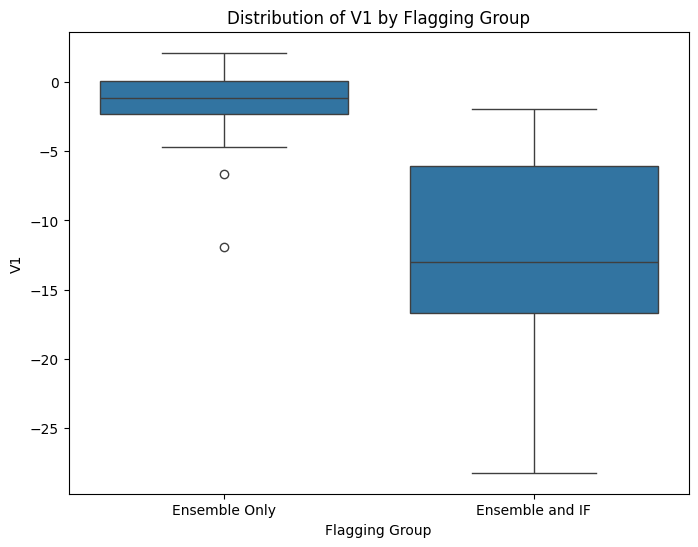

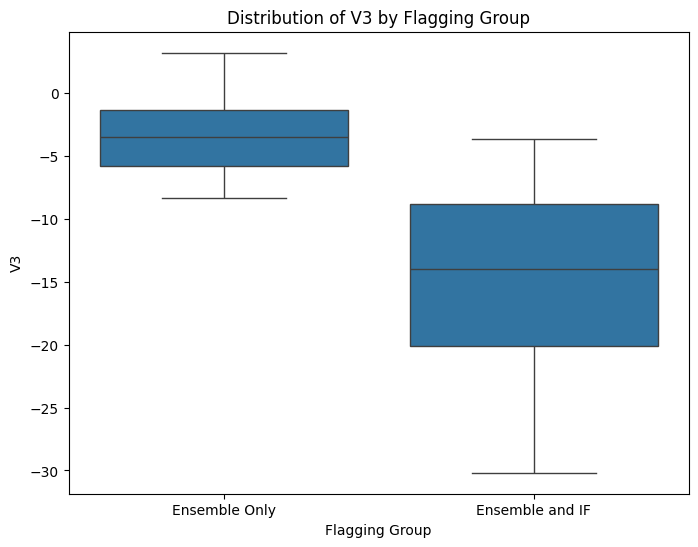

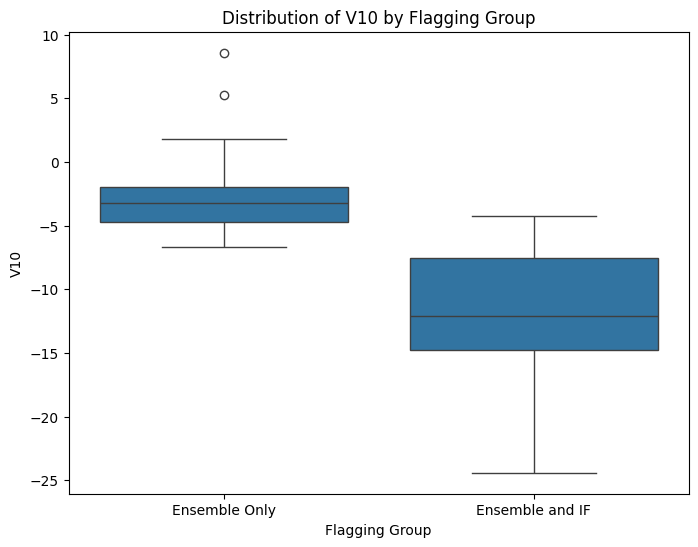

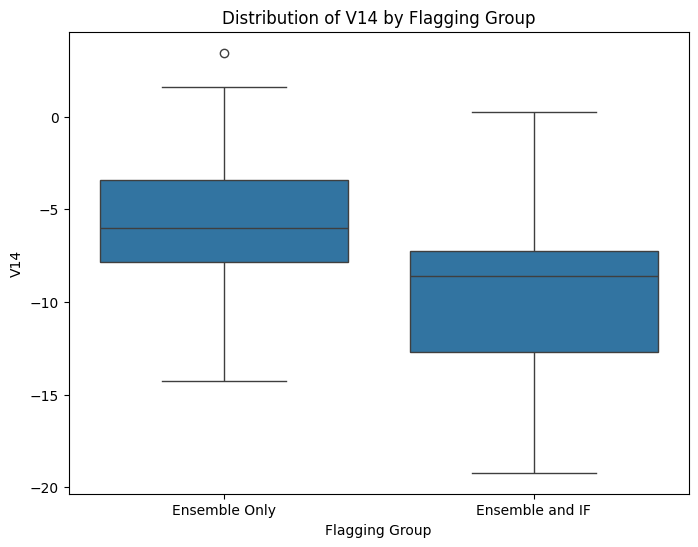

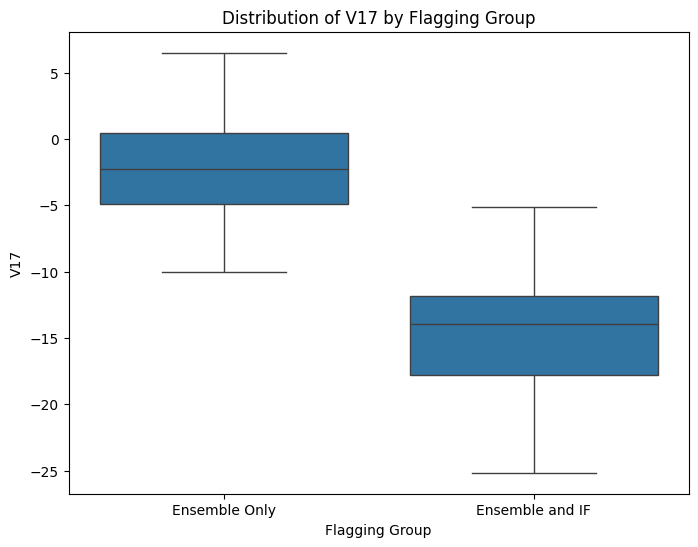

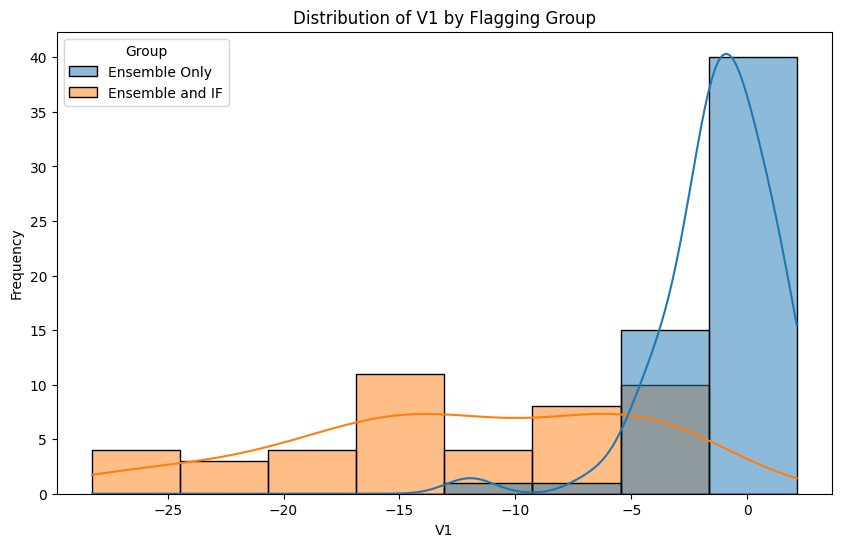

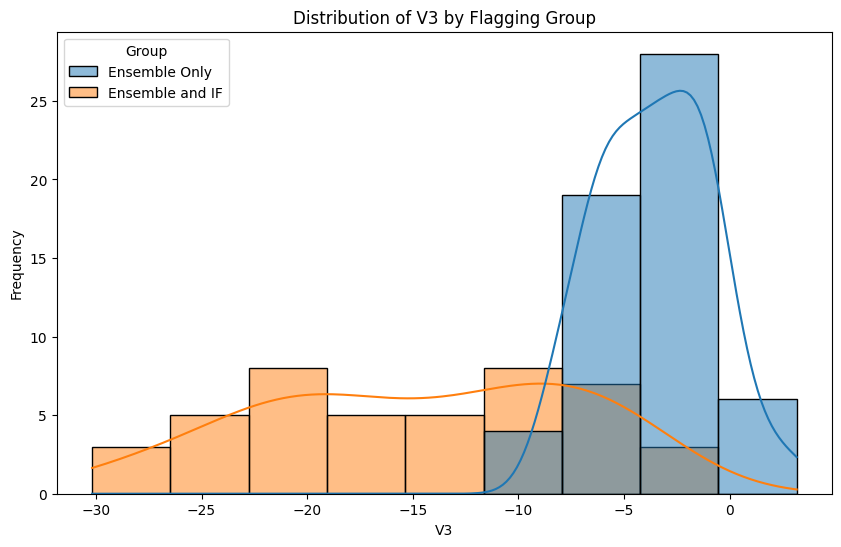

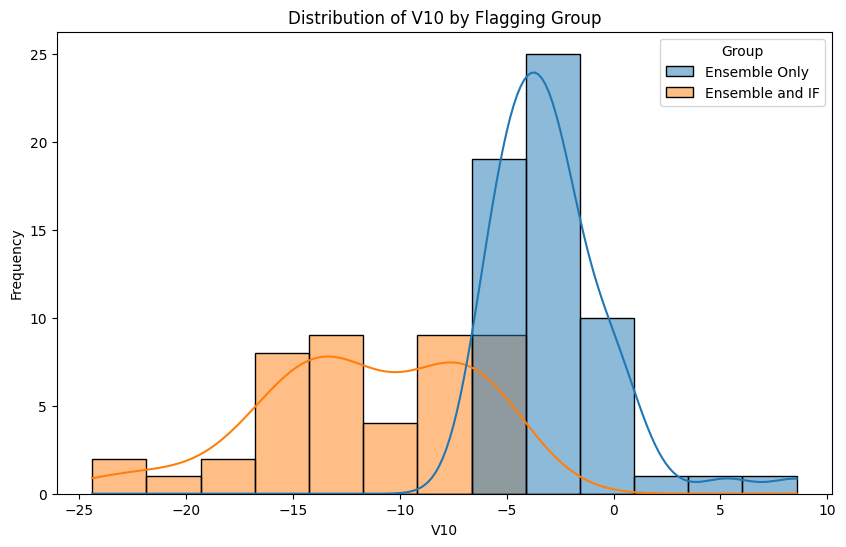

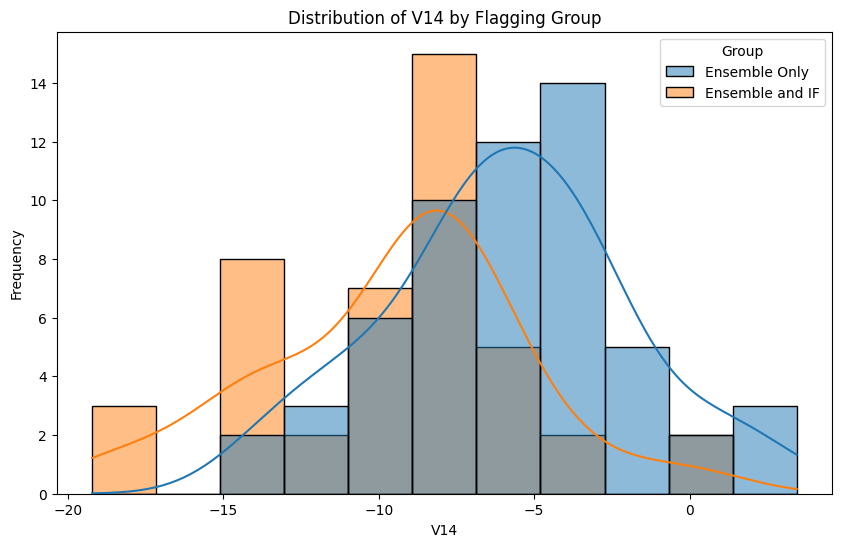

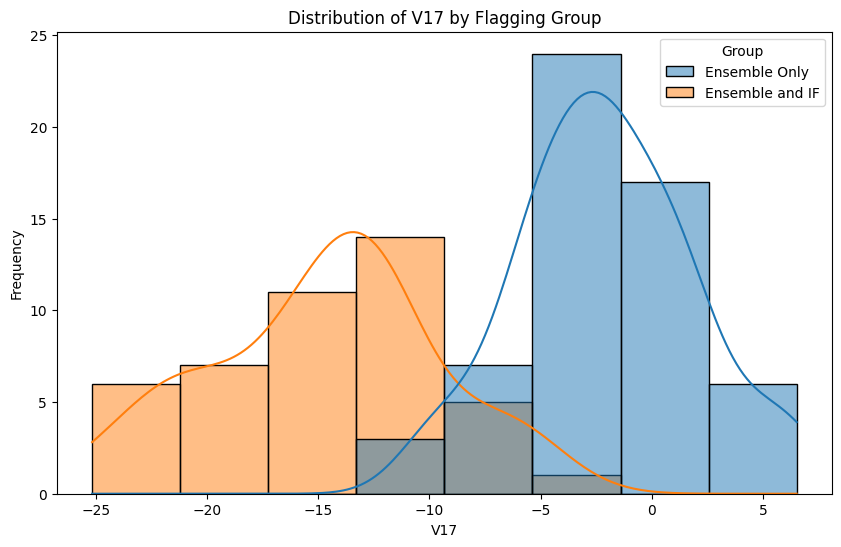

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select representative V features that showed notable differences in summary statistics
# Based on the describe outputs, V1, V3, V4, V9, V10, V12, V14, V16, V17 look promising.
# Let's select a subset for visualization.
selected_v_features = ['V1', 'V3', 'V10', 'V14', 'V17']

# Combine the dataframes for plotting
v_features_ensemble_fraud_not_if['Group'] = 'Ensemble Only'
v_features_ensemble_fraud_and_if['Group'] = 'Ensemble and IF'

combined_v_features = pd.concat([v_features_ensemble_fraud_not_if, v_features_ensemble_fraud_and_if])

# Create box plots for each selected V feature
for feature in selected_v_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Group', y=feature, data=combined_v_features)
    plt.title(f'Distribution of {feature} by Flagging Group')
    plt.xlabel('Flagging Group')
    plt.ylabel(feature)
    plt.show()

# Create histograms for each selected V feature
for feature in selected_v_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=combined_v_features, x=feature, hue='Group', kde=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Flagging Group')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Remove the added 'Group' column from the temporary dataframes
v_features_ensemble_fraud_not_if.drop('Group', axis=1, inplace=True)
v_features_ensemble_fraud_and_if.drop('Group', axis=1, inplace=True)

## Discuss strategy refinement




In [47]:
# Step 1: Discuss characteristics of transactions flagged by ensemble but not by Isolation Forest
print("Characteristics of Transactions Flagged by Ensemble but NOT by Isolation Forest:")
print("Based on the summary statistics and visualizations of the V features, this group of transactions tends to have V feature values that are less extreme and show lower variability compared to the group flagged by both models. Their distributions for these features are often closer to the distributions of non-fraudulent transactions as seen in the broader dataset (though we didn't explicitly plot non-fraudulent data here, the 'Ensemble and IF' group clearly deviates more). This suggests that these fraudulent transactions are not as easily detectable as anomalies based solely on the V features' deviation from the norm, which is the primary detection mechanism for Isolation Forest. The ensemble model, being supervised and trained on labeled data (including both fraud and non-fraud), likely learns more complex patterns and interactions across a wider set of features (including scaled Time, Amount, and the engineered feature) that are indicative of fraud, even if the V features themselves aren't extremely anomalous in isolation.")

print("\n" + "="*50 + "\n")

# Step 2: Discuss characteristics of transactions flagged by both models
print("Characteristics of Transactions Flagged by Ensemble AND by Isolation Forest:")
print("This group of transactions shows significantly more extreme values and higher variability in the V features. Their distributions are clearly distinct from the transactions flagged only by the ensemble, and presumably even more so from typical non-fraudulent transactions. These are likely 'clearer' or more 'obvious' anomalies that stand out strongly in the V feature space. Both the unsupervised Isolation Forest (designed to find points that are isolated from the majority) and the supervised ensemble model (trained to identify fraudulent patterns) are able to detect these transactions due to their pronounced deviation from the norm in the V features.")

print("\n" + "="*50 + "\n")

# Step 3 & 4: Propose strategies for combining the models and discuss potential improvements
print("Strategies for Combining Ensemble and Isolation Forest for Improved Fraud Detection:")

print("\nStrategy 1: Isolation Forest as a First-Pass Filter")
print("Description: Apply the Isolation Forest model first. Transactions flagged as anomalies (with anomaly scores below a certain threshold) are immediately flagged as high-risk or sent for further review. The remaining transactions are then processed by the ensemble model for a second layer of detection.")
print("Potential Improvement: This can potentially speed up the processing of 'obvious' anomalies identified by IF, reducing the computational load on the ensemble model. It might also catch some fraud cases that the ensemble, perhaps due to the limitations of the training data or model complexity, might miss but are strong anomalies in the V feature space.")
print("Potential Drawbacks: Setting the right threshold for IF is crucial. A low threshold might miss many anomalies, while a high threshold might incorrectly flag too many legitimate transactions, leading to unnecessary reviews. It relies heavily on the assumption that 'obvious' anomalies are fraudulent.")

print("\nStrategy 2: Anomaly Score as an Additional Feature")
print("Description: Include the Isolation Forest anomaly score as an additional feature in the training and prediction process of the ensemble model.")
print("Potential Improvement: This allows the ensemble model to leverage the unsupervised anomaly information learned by Isolation Forest. The ensemble can then decide how much weight to give this feature along with the other features, potentially improving its ability to discriminate between fraud and non-fraud, especially for cases where the V features contribute to the anomalous nature but aren't solely defining.")
print("Potential Drawbacks: Requires retraining the ensemble model. The relationship between the anomaly score and fraud might not be linear and might require careful feature engineering or model choice within the ensemble.")

print("\nStrategy 3: Rule-Based Combination")
print("Description: Define rules for flagging transactions as high-risk based on the outputs of both models. Examples: Flag if ensemble probability > threshold AND IF anomaly score < threshold; Flag if ensemble probability > high_threshold OR IF anomaly score < low_threshold; Create different risk tiers (e.g., highest risk if flagged by both, moderate risk if flagged by one).")
print("Potential Improvement: Provides flexibility to tailor the detection strategy based on business requirements and risk tolerance. Can combine the strengths of both models – the ensemble's learned patterns and IF's anomaly detection.")
print("Potential Drawbacks: Requires careful tuning of multiple thresholds. Can be complex to manage if many rules are defined. The interaction between the models is defined by static rules rather than being learned dynamically as in Strategy 2.")

print("\nStrategy 4: Adjusting Ensemble Threshold based on Anomaly Score")
print("Description: Dynamically adjust the classification threshold for the ensemble model based on the Isolation Forest anomaly score. For transactions with lower anomaly scores (more anomalous), a lower ensemble probability threshold could be used to flag them as fraud, and vice-versa.")
print("Potential Improvement: Allows for a more nuanced approach to high-risk flagging, potentially increasing recall for subtle fraud cases that are somewhat anomalous and increasing precision for transactions that are not anomalous according to IF.")
print("Potential Drawbacks: More complex to implement and tune. The relationship between the optimal ensemble threshold and the anomaly score needs to be carefully determined, potentially requiring additional calibration or modeling.")

print("\nOverall Discussion:")
print("Combining the unsupervised anomaly detection capabilities of Isolation Forest with the supervised learning power of ensemble models offers a promising approach to improve fraud detection. The analysis showed that Isolation Forest is effective at identifying transactions with extreme deviations in V features, while the ensemble model can capture more subtle patterns. By strategically combining their outputs, we can aim for a more comprehensive and robust system that is better at identifying a wider range of fraudulent activities, potentially improving both precision and recall, depending on the chosen strategy and its tuning. The specific strategy chosen would depend on factors like computational resources, the desired balance between false positives and false negatives, and the interpretability requirements of the system.")

# Step 5: Briefly discuss potential drawbacks - included in the discussion for each strategy above.


Characteristics of Transactions Flagged by Ensemble but NOT by Isolation Forest:
Based on the summary statistics and visualizations of the V features, this group of transactions tends to have V feature values that are less extreme and show lower variability compared to the group flagged by both models. Their distributions for these features are often closer to the distributions of non-fraudulent transactions as seen in the broader dataset (though we didn't explicitly plot non-fraudulent data here, the 'Ensemble and IF' group clearly deviates more). This suggests that these fraudulent transactions are not as easily detectable as anomalies based solely on the V features' deviation from the norm, which is the primary detection mechanism for Isolation Forest. The ensemble model, being supervised and trained on labeled data (including both fraud and non-fraud), likely learns more complex patterns and interactions across a wider set of features (including scaled Time, Amount, and the enginee

## Summarize analysis




In [48]:
# Comprehensive Summary of Fraud Detection Analysis

print("--- Comprehensive Summary of Fraud Detection Analysis ---")

print("\n1. Data Loading and Initial Exploration:")
print("   - The credit card transaction data was loaded into a pandas DataFrame.")
print("   - Initial exploration revealed a significant class imbalance, with fraudulent transactions (Class 1) representing a very small percentage (0.17%) of the total transactions compared to non-fraudulent ones (Class 0).")

print("\n2. Data Preprocessing:")
print("   - 'Time' and 'Amount' features were scaled using StandardScaler to normalize their ranges.")
print("   - Outliers in the 'Amount' column were identified and removed using the Interquartile Range (IQR) method. This step aimed to reduce the influence of extreme values, particularly in the 'Amount' feature, which could impact model training.")

print("\n3. Feature Engineering:")
print("   - A new feature, 'avg_amount_by_time', was created by grouping transactions by rounded time intervals and calculating the mean transaction amount within those intervals. This feature was also scaled.")

print("\n4. Handling Class Imbalance:")
print("   - The RandomUnderSampler technique was applied to the cleaned DataFrame ('df_cleaned') to balance the class distribution for supervised model training. This resulted in a resampled dataset ('X_resampled', 'y_resampled') with an equal number of fraudulent and non-fraudulent transactions.")

print("\n5. Dimensionality Reduction:")
print("   - Principal Component Analysis (PCA) was applied to the resampled features (excluding original Time, Amount, and engineered features) as the number of features was slightly over 30. PCA was configured to retain 95% of the variance, resulting in a reduced set of components ('X_pca').")

print("\n6. Model Building and Hyperparameter Tuning:")
print("   - Three ensemble models were chosen for supervised classification: Random Forest, XGBoost, and Gradient Boosting Machine.")
print("   - The models were trained on the resampled and PCA-transformed training data ('X_train', 'y_train').")
print("   - Hyperparameter tuning was performed using GridSearchCV with F1-score as the scoring metric to find the best parameters for each model based on 5-fold cross-validation on the training data. The best performing models were stored.")

print("\n7. Anomaly Detection (Isolation Forest):")
print("   - An Isolation Forest model was trained separately on the original 'V' features (V1-V28) of the non-fraudulent transactions ('df_non_fraud'). This unsupervised model aims to identify anomalies based on how easily they can be 'isolated' from the majority of the data.")
print("   - Anomaly scores were obtained from the trained Isolation Forest model for the test set transactions using their original 'V' features.")

print("\n8. Model Evaluation:")
print("   - The performance of the trained ensemble models (using their best hyperparameters) was evaluated on the test set ('X_test', 'y_test') using metrics appropriate for imbalanced datasets: precision, recall, F1-score, and AUC-ROC.")
print("   - The evaluation results showed high performance for all three ensemble models, with AUC-ROC values above 0.97, indicating their strong ability to distinguish between fraud and non-fraud on the balanced test set.")
print("   - An ensemble prediction was created by averaging the predicted probabilities from the best XGBoost and GBM models.")

print("\n9. Operational Risk Estimation:")
print("   - The average amount for fraudulent transactions from the original dataset was calculated.")
print("   - The total estimated operational risk on the test set was calculated by summing the product of the ensemble model's predicted fraud probabilities for each test transaction and the average fraud amount. This provides a monetary estimate of the potential loss.")

print("\n10. Insights from Combining Supervised and Unsupervised Methods:")
print("    - An analysis was conducted to compare transactions flagged as fraud by the ensemble model but not by Isolation Forest ('Ensemble Only') versus those flagged by both models ('Ensemble and IF').")
print("    - By examining the summary statistics and visualizations of the V features for these two groups, it was observed that transactions flagged by both models tended to exhibit more extreme and variable values in the V features, making them clearer anomalies for Isolation Forest.")
print("    - In contrast, transactions flagged only by the ensemble model showed less extreme V feature values, suggesting they might represent more subtle forms of fraud that are harder for Isolation Forest to detect based solely on these features. The ensemble model, utilizing supervised learning and a richer set of features (including scaled Time, Amount, and engineered features), appears capable of identifying these subtler patterns.")
print("    - This highlights that supervised and unsupervised methods can capture different aspects of fraudulent behavior. Supervised models learn from labeled examples to identify known patterns, while unsupervised models find deviations from the norm, potentially uncovering novel or subtle anomalies.")

print("\n11. Strategies for Combining Models and Future Steps:")
print("    - Several strategies were discussed for integrating the Isolation Forest anomaly scores with the ensemble model's predictions, including using IF as a filter, adding the anomaly score as a feature to the ensemble, rule-based combinations, and adjusting ensemble thresholds based on anomaly scores.")
print("    - Future steps could involve implementing and evaluating these combination strategies to determine which approach yields the best overall fraud detection performance for the specific business context.")
print("    - Further analysis could focus on the characteristics of false positives and false negatives from the combined system to refine the models or the flagging rules.")
print("    - Exploring other anomaly detection algorithms or feature engineering techniques could also potentially improve the system.")

print("\n--- Analysis Summary Complete ---")

--- Comprehensive Summary of Fraud Detection Analysis ---

1. Data Loading and Initial Exploration:
   - The credit card transaction data was loaded into a pandas DataFrame.
   - Initial exploration revealed a significant class imbalance, with fraudulent transactions (Class 1) representing a very small percentage (0.17%) of the total transactions compared to non-fraudulent ones (Class 0).

2. Data Preprocessing:
   - 'Time' and 'Amount' features were scaled using StandardScaler to normalize their ranges.
   - Outliers in the 'Amount' column were identified and removed using the Interquartile Range (IQR) method. This step aimed to reduce the influence of extreme values, particularly in the 'Amount' feature, which could impact model training.

3. Feature Engineering:
   - A new feature, 'avg_amount_by_time', was created by grouping transactions by rounded time intervals and calculating the mean transaction amount within those intervals. This feature was also scaled.

4. Handling Class Im

*   **Analysis Approach:** We built and evaluated supervised ensemble models (XGBoost, GBM) and an unsupervised anomaly detection model (Isolation Forest), then analyzed their combined insights to improve fraud detection.
*   **Key Finding:** By comparing transactions flagged by our ensemble model (XGBoost, GBM), we found those also identified as anomalous by Isolation Forest (44 transactions, 44% of ensemble-flagged) showed significantly more extreme V-feature distributions than those flagged only by the ensemble (57 transactions).